<a href="https://colab.research.google.com/github/Adibprak0911/Color-detector-/blob/main/Life_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


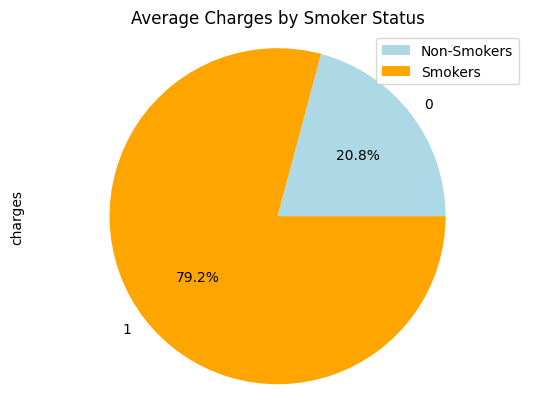

In [ ]:
charges_mean = df.groupby('smoker')['charges'].mean()
charges_mean.plot(kind='pie', colors=['lightblue', 'orange'], autopct='%1.1f%%')
plt.legend(labels=['Non-Smokers', 'Smokers'], loc='upper right')
plt.axis('equal')
plt.title('Average Charges by Smoker Status')
plt.show()

Text(0.5, 1.0, 'Distribution of bmi')

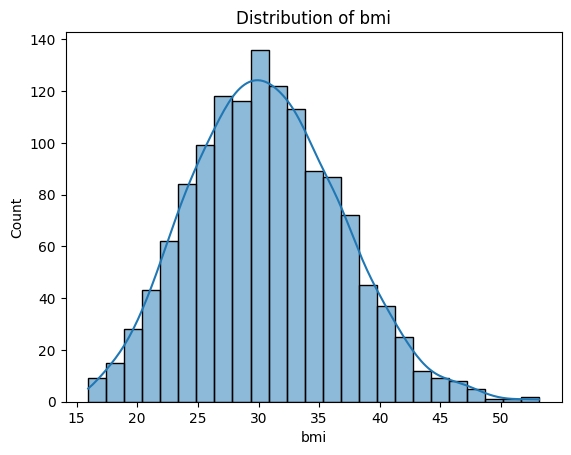

In [ ]:
sns.histplot(df["bmi"],kde=True)
plt.title("Distribution of bmi")

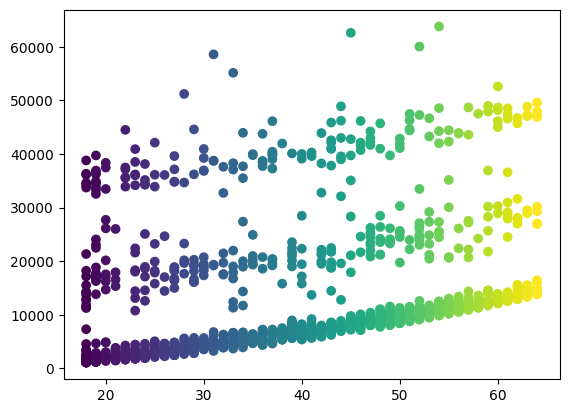

In [ ]:
_ = plt.scatter(df['age'], df['charges'], c=df['age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
X = df.drop('charges', axis=1)
Y = df['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [ ]:
df.groupby('charges').mean()

,age,sex,bmi,children,smoker,region
charges,,,,,,
1121.87390,18.0,1.0,23.210,0.0,0.0,2.0
1131.50660,18.0,1.0,30.140,0.0,0.0,2.0
1135.94070,18.0,1.0,33.330,0.0,0.0,2.0
1136.39940,18.0,1.0,33.660,0.0,0.0,2.0
1137.01100,18.0,1.0,34.100,0.0,0.0,2.0
...,...,...,...,...,...,...
55135.40209,33.0,0.0,35.530,0.0,1.0,1.0
58571.07448,31.0,0.0,38.095,1.0,1.0,0.0
60021.39897,52.0,1.0,34.485,3.0,1.0,1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, n_jobs=2, random_state=2)

scores = cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)
print(scores)
rmse_values = np.sqrt(-scores)
std = np.std(rmse_values)

print("Cross-Validation Results:")
print("RMSE values for each fold:", rmse_values)
print("Mean RMSE:", np.mean(rmse_values))
print("Standard Deviation of RMSE:", std)

[-25555701.96423777 -22101924.65094594 -30502559.7740247
 -25461281.9655112  -22474419.21503752]
Cross-Validation Results:
RMSE values for each fold: [5055.26477687 4701.26840873 5522.91225478 5045.91735619 4740.71927191]
Mean RMSE: 5013.216413696251
Standard Deviation of RMSE: 294.6840738790136


TypeError: 'str' object is not callable

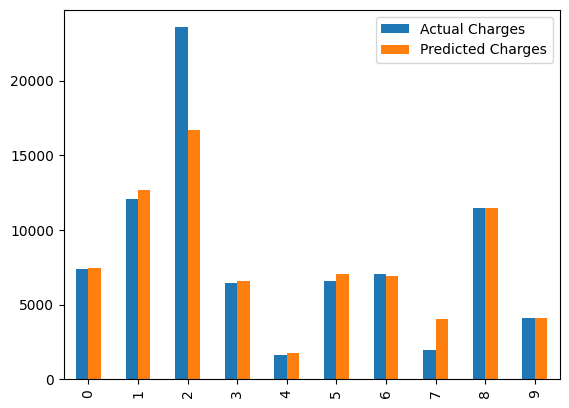

In [ ]:
model.fit(X_train,Y_train)
train_predictions = model.predict(X_train)
compare = pd.DataFrame({
    'Actual Charges': (Y_train.values[:10]),
    'Predicted Charges': train_predictions[:10]
})
compare.plot(kind='bar')
plt.xlabel('Cases', fontsize = 12)
plt.ylabel('Charges', fontsize = 12)
plt.show()

TypeError: 'str' object is not callable

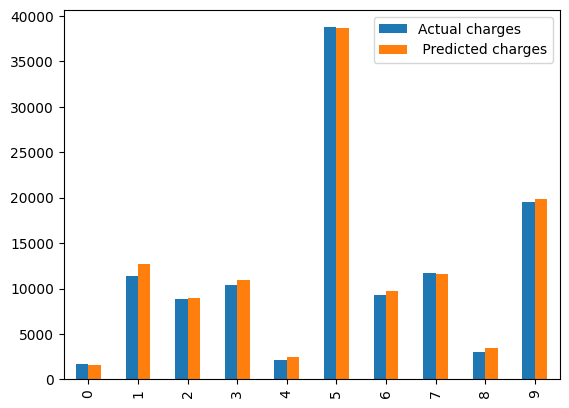

In [ ]:
test_predictions = model.predict(X_test)
compare = pd.DataFrame(
    {'Actual charges': (Y_test.values[:10]),
    ' Predicted charges':test_predictions[:10]
     })
compare.plot(kind = 'bar')
plt.xlabel('Cases')
plt.ylabel('Charges')
plt.show()

In [ ]:
input_data = (19,0,27.900,0,1,3)
output_data = (16884.92400)
input_data_as_nparray = np.asarray(input_data)
input_data_reshaped = input_data_as_nparray.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
error_percentage = (prediction - output_data)/output_data
print(error_percentage)

[17061.1091287]
[0.01043446]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
